In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
# just copying the values(incl. NaN) of Age to Age_imputed
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_train.isnull().sum()

Age            148
Fare             0
Age_imputed    148
dtype: int64

In [10]:
# now here replacing NaN values in Age_imputed column with
# the a sample of random values from "age" column,

# after removing all the NaN from "age" 
# taking a random sample of remaining values of length equal to total NaN values.

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [11]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([33.  , 40.  , 30.  , 32.5 , 47.  , 24.  , 17.  , 57.  ,  4.  ,
       36.  , 28.5 , 39.  , 45.  , 26.  , 11.  , 21.  , 25.  ,  6.  ,
        1.  , 33.  , 18.  , 36.  , 43.  , 28.  , 32.  , 29.  , 33.  ,
       25.  , 30.  , 39.  ,  0.75, 13.  , 45.  , 30.  , 25.  ,  6.  ,
       20.  , 35.  , 54.  , 42.  , 22.  ,  2.  , 46.  , 23.  , 17.  ,
       56.  , 24.  , 34.  , 36.  , 18.  , 31.  , 31.  , 24.  ,  7.  ,
       14.  , 27.  , 38.  , 41.  , 36.  ,  2.  , 35.  , 47.  , 60.  ,
       40.5 , 19.  , 32.  , 17.  , 60.  , 30.  , 40.  , 58.  , 27.  ,
       21.  , 25.  , 38.  , 22.  , 52.  , 32.  , 18.  , 21.  , 26.  ,
       24.  , 56.  , 21.  , 14.  , 30.  , 36.  , 20.  , 30.  , 19.  ,
       44.  , 42.  , 56.  , 33.  , 40.  , 26.  , 40.  ,  2.  , 32.  ,
       36.  , 63.  , 29.  , 43.  , 31.  , 27.  , 33.  ,  2.  , 36.  ,
       60.  , 16.  ,  8.  , 19.  , 34.  , 11.  , 26.  , 35.  , 24.  ,
        4.  ,  9.  , 23.  , 22.  , 61.  , 52.  , 31.  , 22.  , 30.  ,
       51.  , 54.  ,

In [12]:
# after removing these values
# sample of whatever is remaining, is replaced in imputed column0 
X_train['Age'].isnull().sum()

148

In [13]:
# Now all the NaN are imputed with random values.
X_train.isnull().sum()

Age            148
Fare             0
Age_imputed      0
dtype: int64

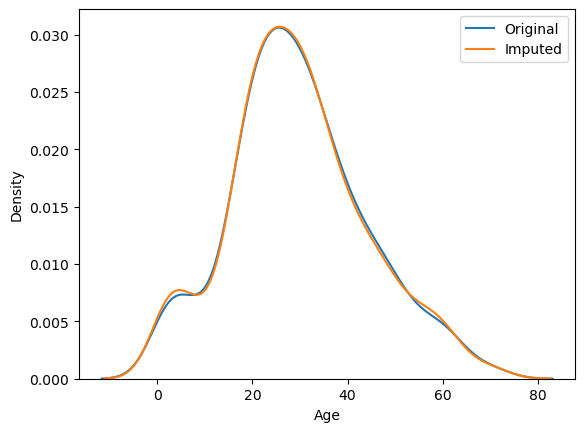

In [14]:
# it's clear that even after imputation,
# distribution is preserved

sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [15]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  206.83880010983086


In [16]:
# Comparison is covariance with other columns, it gets changed after imputation
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,49.332931
Age,71.512440,204.349513,204.349513
Age_imputed,49.332931,204.349513,206.838800


<AxesSubplot: >

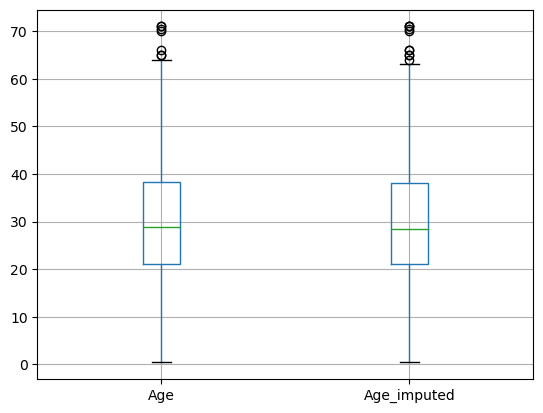

In [17]:
X_train[['Age', 'Age_imputed']].boxplot()

In [18]:
# we can use this to make sure the reproducibility of
# same sample for the same input
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

### Random Sample Imputation for Categorical Data

In [19]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [22]:
X = data
y = data['SalePrice']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
# Again Just Copying the same values
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [25]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
656,NaN,TA,145500,TA,NaN
314,Gd,Fa,178000,Fa,Gd
732,TA,TA,222500,TA,TA
759,TA,TA,290000,TA,TA
1094,NaN,TA,129000,TA,NaN


In [26]:
# Similarly Repalcing NaNs in categories "GarageQual_imputed","FireplaceQu_imputed"
# with the random sample of their respective original colums

X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\piyus\AppData\Local\Temp\ipykernel_16960\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\piyus\AppData\Local\Temp\ipykernel_16960\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\piyus\AppData\Local\Temp\ipykernel_16960\856878696.py:4: SettingWithCopyWarning: 
A va

In [35]:
# here a df, for the comparison of,
# before and after of imputation, of
# frequencies of categories (Ta,Fa,Gd...)
# it's clear that fequencies are almost same 
# before and after , so this imputation is safe.
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [38]:
X_train['GarageQual'].value_counts(), X_train['GarageQual_imputed'].value_counts() 

(TA    1049
 Fa      41
 Gd      11
 Po       1
 Ex       1
 Name: GarageQual, dtype: int64,
 TA    1107
 Fa      47
 Gd      12
 Po       1
 Ex       1
 Name: GarageQual_imputed, dtype: int64)

In [28]:
temp

,original,imputed
TA,0.951043,0.947774
Fa,0.037171,0.040240
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [29]:
# similarly, comparison of,
# before and after of imputation, of
# frequencies of categories (Ta,Fa,Gd...)
# it's clear that fequencies are varying significantly
# before and after , so this imputation is not safe.
# because 50% of data was missing

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.647587
TA,0.412439,0.540965
Fa,0.040917,0.050505
Po,0.027823,0.038159
Ex,0.024550,0.033670


In [39]:
X_train['FireplaceQu'].value_counts()

Gd    302
TA    252
Fa     25
Po     17
Ex     15
Name: FireplaceQu, dtype: int64

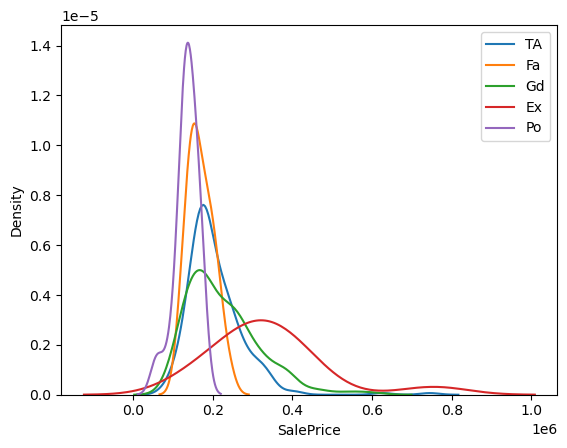

In [46]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)    
plt.legend()
plt.show()

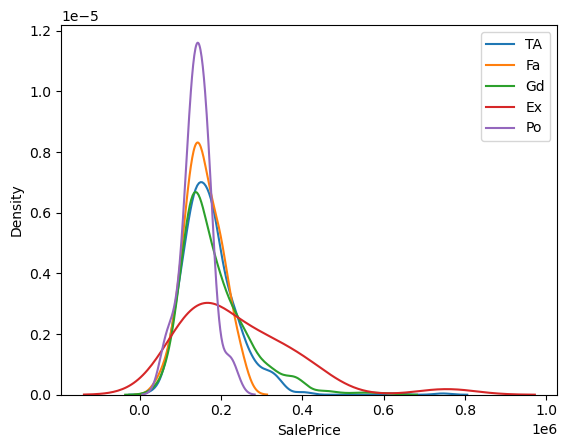

In [47]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)

plt.legend()
plt.show()